In [1]:
import pandas as pd

In [2]:
apt_price = pd.read_csv('apt_price.csv')
apt_price[:2]

,지역명,전용면적,연도,월,분양가격
0,서울,모든면적,2015,10,5841
1,서울,60,2015,10,5652


In [4]:
apt_price['분양가격'] * 3.3
apt_price['평당분양가격'] = apt_price['분양가격'] * 3.3

In [5]:
apt_price[:2]

,지역명,전용면적,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,19275.3
1,서울,60,2015,10,5652,18651.6


In [22]:
# [문제] 전용면적별 평당분양가격 평균과 합
apt_price.groupby('전용면적').평당분양가격.mean()
apt_price.groupby('전용면적').평당분양가격.sum()

전용면적
102~      14157323.4
60        13524188.7
60~85     14237358.3
85~102    12407927.4
모든면적      14291844.6
Name: 평당분양가격, dtype: float64

In [16]:
g_area = apt_price.groupby('전용면적')

In [17]:
g_area.agg(['max', 'min'])

지역명        연도         월       분양가격       평당분양가격     
       max min   max   min max min    max min      max  min
전용면적                                                       
102~    충북  강원  2022  2015  12   1   9733   0  32118.9  0.0
60      충북  강원  2022  2015  12   1  10553   0  34824.9  0.0
60~85   충북  강원  2022  2015  12   1  10746   0  35461.8  0.0
85~102  충북  강원  2022  2015  12   1  13835   0  45655.5  0.0
모든면적    충북  강원  2022  2015  12   1   9983   0  32943.9  0.0

In [18]:
# 평당분양가격의 평균, 분양가격의 평균
g_area.agg({'평당분양가격':'mean', '분양가격':'mean'})

,평당분양가격,분양가격
전용면적,,
102~,10957.680650,3320.509288
60,10467.638313,3172.011610
60~85,11019.627167,3339.280960
85~102,9603.658978,2910.199690
모든면적,11061.799226,3352.060372


In [20]:
# 평당분양가격의 평균, 평당분양가격의 합
g_area.agg({'평당분양가격':['mean', 'sum']})

평당분양가격            
                mean         sum
전용면적                            
102~    10957.680650  14157323.4
60      10467.638313  13524188.7
60~85   11019.627167  14237358.3
85~102   9603.658978  12407927.4
모든면적    11061.799226  14291844.6

In [23]:
# 평당분양가격의 평균, 평당분양가격의 합
g_area.agg({'평당분양가격':['mean', 'sum']}).columns

MultiIndex([('평당분양가격', 'mean'),
            ('평당분양가격',  'sum')],
           )

In [25]:
g_area.평당분양가격.agg(['mean', 'sum'])

,mean,sum
전용면적,,
102~,10957.680650,14157323.4
60,10467.638313,13524188.7
60~85,11019.627167,14237358.3
85~102,9603.658978,12407927.4
모든면적,11061.799226,14291844.6


In [24]:
g_area.평당분양가격.agg(['mean', 'sum']).columns

Index(['mean', 'sum'], dtype='object')

In [26]:
g_area.평당분양가격.agg(**{'평당분양가격 평균':'mean', '평당분양가격 합':'sum'})

,평당분양가격 평균,평당분양가격 합
전용면적,,
102~,10957.680650,14157323.4
60,10467.638313,13524188.7
60~85,11019.627167,14237358.3
85~102,9603.658978,12407927.4
모든면적,11061.799226,14291844.6


In [28]:
# [문제] 전용면적별 지역별 평당분양가격의 평균
apt_price.groupby(['전용면적', '지역명']).평당분양가격.mean()

전용면적  지역명
102~  강원      9760.748684
      경기     15252.165789
      경남      9504.000000
      경북      9537.260526
      광주     10475.155263
                 ...     
모든면적  전남      7963.247368
      전북      7725.473684
      제주     13529.869737
      충남      8243.052632
      충북      7586.439474
Name: 평당분양가격, Length: 85, dtype: float64

In [30]:
# [문제] 전용면적별 지역별 평당분양가격의 평균
apt_price.groupby(['전용면적', '지역명']).평당분양가격.mean().unstack().round(2)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102~,9760.75,15252.17,9504.00,9537.26,10475.16,14163.34,5871.74,13510.50,23247.54,9745.59,5761.32,14506.97,9213.17,8564.80,10480.89,8181.66,8503.71
60,8378.74,13544.94,8854.51,8595.46,9711.12,12964.74,9253.46,12190.24,25266.58,6890.31,8239.67,12358.67,7555.09,7916.18,10524.22,8205.93,7499.99
60~85,8116.09,13101.26,9178.12,8678.87,10910.23,12972.82,10316.67,12597.66,24586.82,9158.02,10241.42,12504.13,7964.12,7691.34,13416.98,8261.72,7637.37
85~102,7640.76,14126.34,11392.38,7441.76,4726.08,11171.59,3224.92,12636.92,27792.47,9201.92,3120.98,12942.17,7330.82,8121.13,5819.81,8248.00,8324.16
모든면적,8159.34,13126.14,9217.20,8700.45,11020.57,12961.27,10364.95,12645.77,24584.35,9607.52,10180.80,12434.14,7963.25,7725.47,13529.87,8243.05,7586.44


In [31]:
# [문제] 전용면적별 지역별 평당분양가격의 평균
apt_price.groupby(['전용면적', '지역명']).평당분양가격.mean().unstack().round(2).T

전용면적,102~,60,60~85,85~102,모든면적
지역명,,,,,
강원,9760.75,8378.74,8116.09,7640.76,8159.34
경기,15252.17,13544.94,13101.26,14126.34,13126.14
경남,9504.00,8854.51,9178.12,11392.38,9217.20
경북,9537.26,8595.46,8678.87,7441.76,8700.45
광주,10475.16,9711.12,10910.23,4726.08,11020.57
대구,14163.34,12964.74,12972.82,11171.59,12961.27
대전,5871.74,9253.46,10316.67,3224.92,10364.95
부산,13510.50,12190.24,12597.66,12636.92,12645.77
서울,23247.54,25266.58,24586.82,27792.47,24584.35


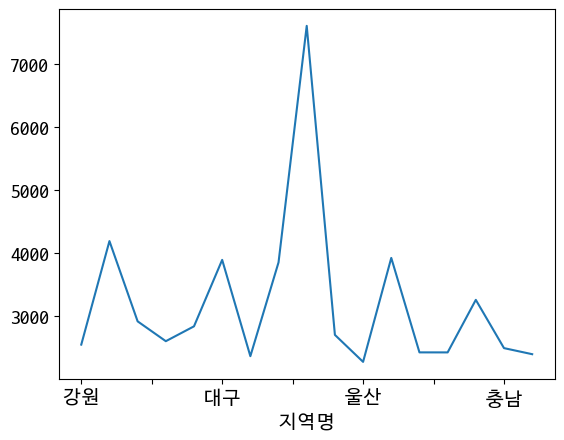

In [86]:
# 지역명별 분양가격의 평균을 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='D2coding')
apt_price.groupby('지역명').분양가격.mean().plot()
plt.show()

<Axes: xlabel='지역명'>

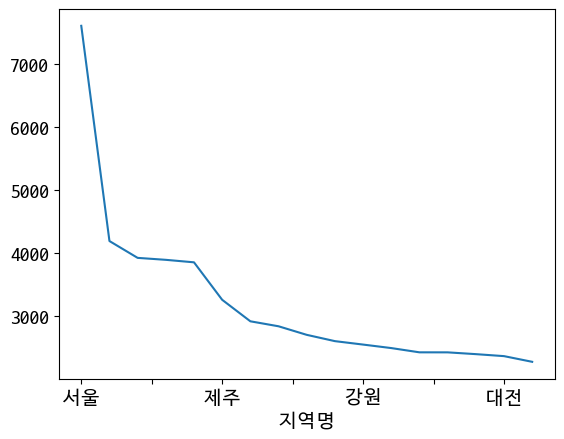

In [87]:
g_local_name = apt_price.groupby('지역명')
g_local_name.분양가격.mean().sort_values(ascending=False).plot()

<Axes: xlabel='지역명'>

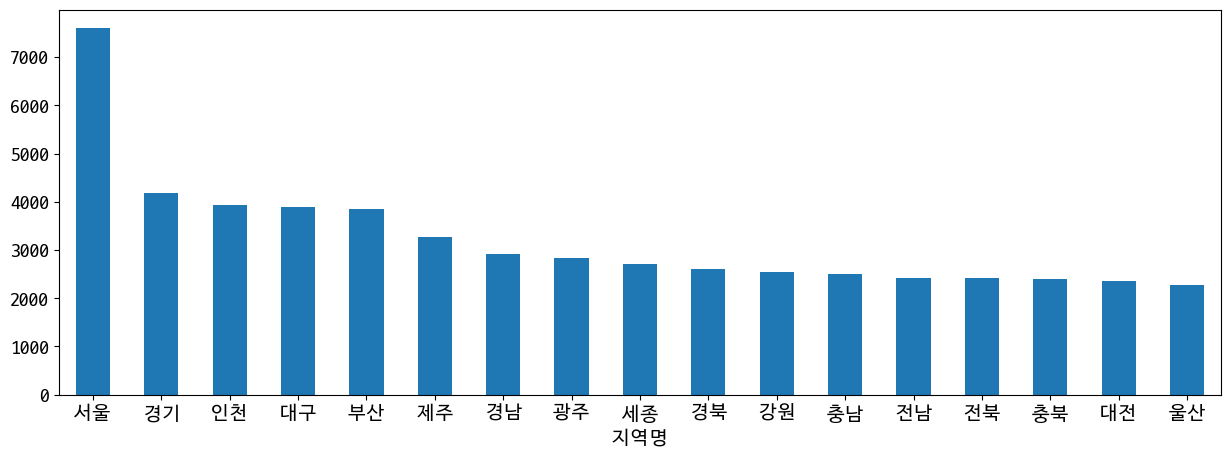

In [88]:
# 막대 그래프 
# rot : 90도로 기울어져서 나오는 지역명 가로로 보이게 설정
g_local_name.분양가격.mean().sort_values(ascending=False).plot(kind='bar', 
                                                           rot=0,
                                                           figsize=(15, 5),
                                                          )

In [49]:
# 전용면적별 분양가격의 평균
g_area = apt_price.groupby('전용면적')
g_area.평당분양가격.mean()

전용면적
102~      10957.680650
60        10467.638313
60~85     11019.627167
85~102     9603.658978
모든면적      11061.799226
Name: 평당분양가격, dtype: float64

<Axes: xlabel='전용면적'>

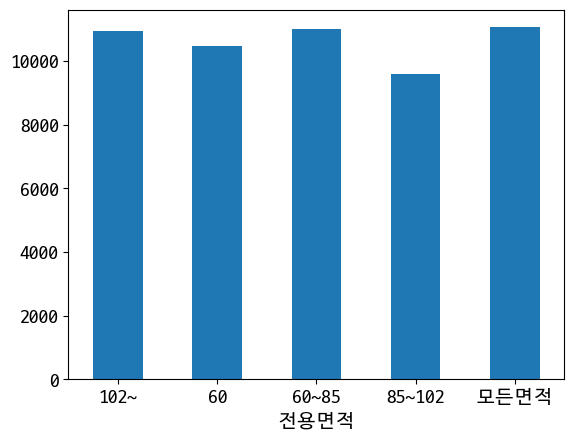

In [89]:
g_area.평당분양가격.mean().plot(kind='bar', rot=0)

In [62]:
x_order = ['60', '60~85', '85~102', '102~', '모든면적']
g_area.평당분양가격.mean().loc[x_order]

전용면적
60        10467.638313
60~85     11019.627167
85~102     9603.658978
102~      10957.680650
모든면적      11061.799226
Name: 평당분양가격, dtype: float64

In [ ]:
help(apt_price.plot)
help(pd.Series.plot)
help(pd.DataFrame.plot)

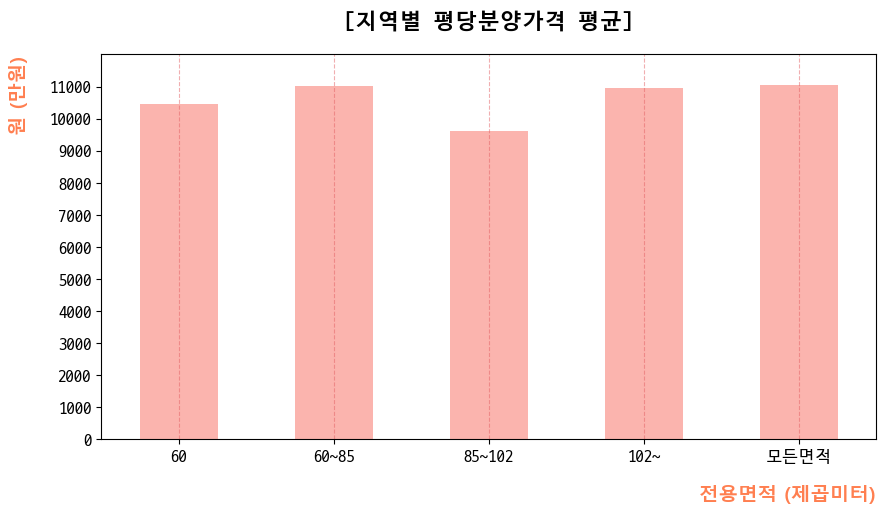

In [151]:
plt.rc('font', size=14)
# plt.rc('axes', titlesize=17)

g_area.평당분양가격.mean().loc[x_order].plot(kind='bar', 
                                       rot=0, 
                                       ylabel='만원',
                                       #title='지역별 평당분양가격 평균',
                                       fontsize=12,
                                       figsize=(10,5),
                                       colormap='Pastel1',
                                      )

# 타이틀 지정
plt.title('[지역별 평당분양가격 평균]', 
          pad=20, # 간격
          loc='center', # 위치
          #fontsize=20,
          fontdict={'fontsize':16, 'fontweight':'bold'},
         )

# x축 레이블 설정
label_font = {
    'family':'Malgun Gothic',
    'color':'coral',
    'weight':'bold',
    'size':14
}
plt.xlabel('전용면적 (제곱미터)', 
           labelpad=15,
           loc='right',
           fontdict=label_font,
          )

# y축 레이블 설정
plt.ylabel('원 (만원)',
          labelpad=15,
          loc='top',
          fontdict=label_font,
          )

# 그리그 설정
plt.grid(True,
         axis='x',  # x 기준으로 선 만들기
         color = '#e35f63',
         alpha=0.5,
         linestyle='--',
        )

# 축의 범위 설정
# plt.xlim([xmin, mxax])
# plt.ylim([ymin,'ymax'])
plt.ylim([0, 12000])

# 눈금 
# plt.xticks([0, 1, 2])
# plt.xticks(range(0, 100, 10))
# plt.xticks(np.range(0, 100, 10))

plt.yticks(range(0, 12000, 1000))

plt.show()

# 가설
## [가설 1] 서울과 경기의 연도별 평당분양가 평균은 지속해서 상승했을 것이다.

In [155]:
g_local_year = apt_price.groupby(['지역명','연도']).평당분양가격.mean().unstack().astype(int)
g_local_year

연도,2015,2016,2017,2018,2019,2020,2021,2022
지역명,,,,,,,,
강원,7188,6207,7318,8219,8934,9615,10291,10633
경기,11060,11684,12296,14258,15665,15106,14567,14970
경남,8459,8496,8806,9327,10162,9827,11302,11363
경북,7464,7753,8011,7523,9050,7998,11227,11736
광주,4750,8271,8479,7145,8881,12512,11881,11689
대구,9018,10282,10972,11532,14081,15314,15586,16065
대전,6552,6683,9417,7675,9043,7117,7196,8015
부산,10377,10743,11637,12889,13537,13353,14317,17544
서울,20315,21753,21864,23202,28286,29781,26442,30354


In [156]:
g_local_year.index

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='지역명')

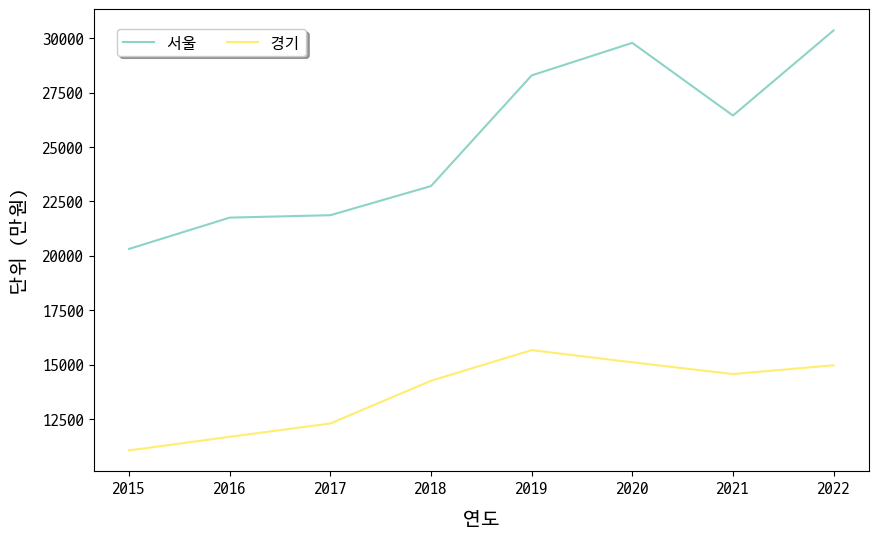

In [184]:
g_local_year.loc[['서울', '경기']].T.plot(colormap='Set3', figsize=(10, 6), fontsize=12)
plt.xlabel('연도', labelpad=10)
plt.ylabel('단위 (만원)', labelpad=10)
# 범례 설정
plt.legend(ncols=2,      # 열의 개수 설정
           fontsize=11, 
           loc=(0.03, 0.9),   # (x축, y축)  1이상이 되면 밖으로 나가짐 
           shadow=True,
          )

In [ ]:
pip install seaborn

In [175]:
import seaborn as sns

In [178]:
apt_price[(apt_price.지역명=='서울') | (apt_price.지역명=='경기')]
local_seoul_kyeonggi = apt_price[apt_price.지역명.isin(['서울', '경기'])]
local_seoul_kyeonggi

,지역명,전용면적,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,19275.3
1,서울,60,2015,10,5652,18651.6
2,서울,60~85,2015,10,5882,19410.6
3,서울,85~102,2015,10,5721,18879.3
4,서울,102~,2015,10,5879,19400.7
...,...,...,...,...,...,...
6385,경기,모든면적,2022,1,4567,15071.1
6386,경기,60,2022,1,4573,15090.9
6387,경기,60~85,2022,1,4646,15331.8
6388,경기,85~102,2022,1,4021,13269.3


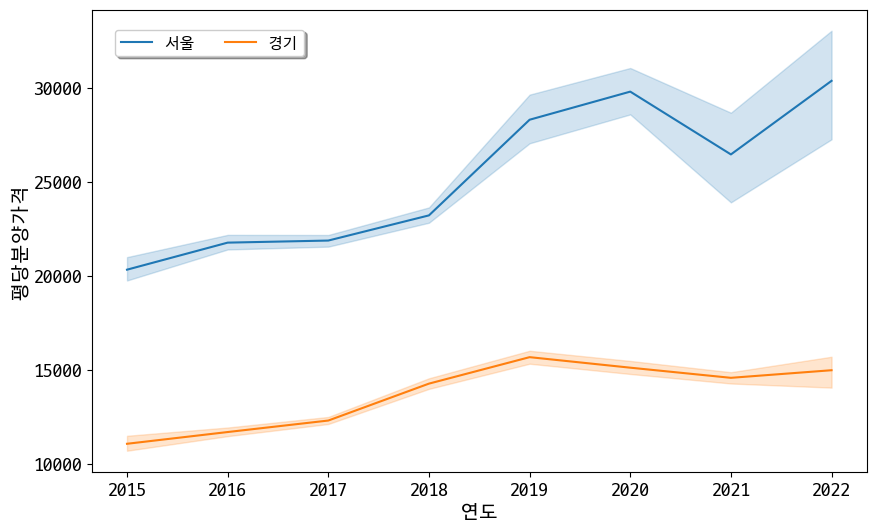

In [187]:
fig = sns.lineplot(data=local_seoul_kyeonggi, 
             x='연도', 
             y='평당분양가격',
             hue='지역명',
            )
plt.legend(ncols=2, fontsize=11, loc=(0.03, 0.9), shadow=True)
fig.figure.set_size_inches(10, 6)